# Passo 1

In [563]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [564]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [1376]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("Dados_Dolar3.csv", sep = ";")
#dol = pd.read_excel("PredDolarInv4.xlsx")

In [1377]:
dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()
dol = dol.set_index("Data")
dol.head()

,Abertura,Maxima,Minima,Fechamento,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,BollingerSup,BollingerInf
Data,,,,,,,,,,,,
2017-08-28,3522020,3535960,3515320,3535960,10300,1310490,46780,92170,17610,2159,3594860,3499860
2017-08-29,3527590,3544880,3524800,3532060,10250,1309500,46310,91620,17816,2129,3595200,3501940
2017-08-30,3534840,3542090,3521460,3527040,10240,1308760,45940,92250,17713,2136,3593870,3506690
2017-08-31,3536480,3538150,3502030,3512590,10110,1322070,47080,92560,17710,2120,3591930,3510760
2017-01-09,3504250,3510920,3483140,3504810,10160,1324970,47330,92100,17760,2166,3592310,3509830


In [1378]:
dol=dol.div(1000)
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [1379]:
#dol["OURO"] = dol["OURO"].pct_change(1)#*100
dol["OURO-1"] = dol["OURO"].shift(1)
dol["OURO-2"] = dol["OURO"].shift(2)
dol["OURO-3"] = dol["OURO"].shift(3)
dol["OURO-4"] = dol["OURO"].shift(4)
dol["OURO-5"] = dol["OURO"].shift(5)

#dol["DXY"] = dol["DXY"].pct_change(1)#*100
dol["DXY-1"] = dol["DXY"].shift(1)
dol["DXY-2"] = dol["DXY"].shift(2)
dol["DXY-3"] = dol["DXY"].shift(3)
dol["DXY-4"] = dol["DXY"].shift(4)
dol["DXY-5"] = dol["DXY"].shift(5)

#dol["WTIBRENT"] = dol["WTIBRENT"].pct_change(1)#*100
dol["WTIBRENT-1"] = dol["WTIBRENT"].shift(1)
dol["WTIBRENT-2"] = dol["WTIBRENT"].shift(2)
dol["WTIBRENT-3"] = dol["WTIBRENT"].shift(3)
dol["WTIBRENT-4"] = dol["WTIBRENT"].shift(4)
dol["WTIBRENT-5"] = dol["WTIBRENT"].shift(5)

#dol["MXN"] = dol["MXN"].pct_change(1)#*100
dol["MXN-1"] = dol["MXN"].shift(1)
dol["MXN-2"] = dol["MXN"].shift(2)
dol["MXN-3"] = dol["MXN"].shift(3)
dol["MXN-4"] = dol["MXN"].shift(4)
dol["MXN-5"] = dol["MXN"].shift(5)

In [1380]:
per = 1

#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(per)
dol["Retorno-1"] = dol["Retorno"].shift(1)
dol["Retorno-2"] = dol["Retorno-1"].shift(1)
dol["Retorno-3"] = dol["Retorno-2"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()
#dol["DistBoll"] = pd.qcut(dol["DistBoll"], 10, labels = False)
dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)
#dol["DistBoll-4"] = dol["DistBoll"].shift(4)
#dol["DistBoll-5"] = dol["DistBoll"].shift(5)

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Maxima"]-dol["Minima"])

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], 1, 0)
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)
#dol["dirD-4"] = dol["dirD"].shift(4)
#dol["dirD-5"] = dol["dirD"].shift(5)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()

# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)
#dol["zscore-4"] = dol["zscore"].shift(4)
#dol["zscore-5"] = dol["zscore"].shift(5)

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1


dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
dol["Pips-1"] = dol["Pips"].shift(1)
dol["Pips-2"] = dol["Pips"].shift(2)
dol["Pips-3"] = dol["Pips"].shift(3)
#dol["Pips-4"] = dol["Pips"].shift(4)
#dol["Pips-5"] = dol["Pips"].shift(5)

In [1381]:
dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)
#dol["DI25"] = pd.qcut(dol["DI25"], 10, labels = False)
#dol["T10USA"] = pd.qcut(dol["T10USA"], 10, labels = False)
dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["prop-1"] = dol["prop"].shift(1)
dol["prop-2"] = dol["prop"].shift(2)
dol["prop-3"] = dol["prop"].shift(3)
#dol["prop-5"] = dol["prop"].shift(4)
#dol["prop-4"] = dol["prop"].shift(5)
dol["MMDistBoll15"] = pd.qcut(dol["MMDistBoll15"], 10, labels = False)

In [1382]:
#dol.isna().sum().sum()
dol=dol.dropna(axis=0)

In [1383]:
dol = dol.drop(["Abertura", "Fechamento", "Minima", "Maxima", "MM"], axis = 1)
dol.columns

Index(['DI25', 'OURO', 'WTIBRENT', 'DXY', 'MXN', 'T10USA', 'BollingerSup',
       'BollingerInf', 'OURO-1', 'OURO-2', 'OURO-3', 'OURO-4', 'OURO-5',
       'DXY-1', 'DXY-2', 'DXY-3', 'DXY-4', 'DXY-5', 'WTIBRENT-1', 'WTIBRENT-2',
       'WTIBRENT-3', 'WTIBRENT-4', 'WTIBRENT-5', 'MXN-1', 'MXN-2', 'MXN-3',
       'MXN-4', 'MXN-5', 'Alvo', 'Retorno', 'Retorno-1', 'Retorno-2',
       'Retorno-3', 'DistBoll', 'MMDistBoll5', 'MMDistBoll15', 'DistBoll-1',
       'DistBoll-2', 'DistBoll-3', 'std5', 'std15', 'prop', 'dirD', 'dirD-1',
       'dirD-2', 'dirD-3', 'zscore', 'zscore-1', 'zscore-2', 'zscore-3', 'RSL',
       'Pips', 'Pips-1', 'Pips-2', 'Pips-3', 'prop-1', 'prop-2', 'prop-3'],
      dtype='object')

In [1384]:
# Treinamento de 2017 a 2020.1
sTrain = "2017-08-28"
eTrain = "2020-06-30"
# Teste de 2020.2 até agora 
sTest = "2020-07-01" #"2020-07-01"
eTest = "2021-07-05"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(708, 58)
(238, 58)


In [1385]:
xTrain = dfTrain.drop(["Alvo"], axis = 1)
yTrain = dfTrain["Alvo"]

xTest = dfTest.drop(["Alvo"], axis = 1)
yTest = dfTest["Alvo"]

In [1398]:
mlp = MLPClassifier(hidden_layer_sizes = (200,200,200), max_iter = 100,
                   solver = "sgd", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh") # activation = "tanh"

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 0.74058133
Iteration 2, loss = 0.72042058
Iteration 3, loss = 0.70846658
Iteration 4, loss = 0.70151166
Iteration 5, loss = 0.69824013
Iteration 6, loss = 0.69701275
Iteration 7, loss = 0.69448430
Iteration 8, loss = 0.69355258
Iteration 9, loss = 0.69270807
Iteration 10, loss = 0.69153305
Iteration 11, loss = 0.69117831
Iteration 12, loss = 0.69074564
Iteration 13, loss = 0.69037392
Iteration 14, loss = 0.69039898
Iteration 15, loss = 0.69050540
Iteration 16, loss = 0.69086626
Iteration 17, loss = 0.69016096
Iteration 18, loss = 0.69051602
Iteration 19, loss = 0.69074343
Iteration 20, loss = 0.69026772
Iteration 21, loss = 0.69013433
Iteration 22, loss = 0.69050359
Iteration 23, loss = 0.69032994
Iteration 24, loss = 0.69039984
Iteration 25, loss = 0.69005032
Iteration 26, loss = 0.69030453
Iteration 27, loss = 0.69000477
Iteration 28, loss = 0.68984760
Iteration 29, loss = 0.68983487
Iteration 30, loss = 0.68993812
Iteration 31, loss = 0.68983602
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 200, 200),
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=100,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [1399]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [1400]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[153 198]
 [131 226]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.54      0.44      0.48       351
           1       0.53      0.63      0.58       357

    accuracy                           0.54       708
   macro avg       0.54      0.53      0.53       708
weighted avg       0.54      0.54      0.53       708


Acurácia:  53.531


In [1401]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[51 67]
 [40 80]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.56      0.43      0.49       118
           1       0.54      0.67      0.60       120

    accuracy                           0.55       238
   macro avg       0.55      0.55      0.54       238
weighted avg       0.55      0.55      0.54       238


Acurácia:  55.042


In [835]:
predTot = mlp.predict(dol.drop(["Alvo"], axis = 1))

In [553]:
dol.loc[:,"Previsto"] = predTot
dol.loc[:,"RetornoMod"] = predTot = dol.loc[:,"Previsto"]*dol["Retorno"]

#simulando um stop de 3%

stop = 0.02
dol.loc[:,"RetornoMod"] = np.where(dol.loc[:,"RetornoMod"] < -stop, stop, dol.loc[:, "RetornoMod"])

dol.loc[:,"RetornoModAcum"] = dol["RetornoMod"].cumsum()

In [554]:
dol.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()

Data
2021-06-29    0.920459
2021-06-30    0.926512
2021-01-07    0.942256
2021-02-07    0.942256
2021-05-07    0.942256
Name: RetornoModAcum, dtype: float64

In [555]:
dol.index.name = "Date"
dol.reset_index(inplace = True)
dol["Date"] = pd.to_datetime(dol["Date"])
dol["TrainTest"] = np.where(dol["Date"] > eTrain,1,-1)

In [556]:
dol.head(1)

,Date,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,BollingerSup,BollingerInf,OURO-1,...,Pips-5,prop-1,prop-2,prop-3,prop-5,prop-4,Previsto,RetornoMod,RetornoModAcum,TrainTest
0,2017-09-20,9.79,1301.15,50.3,91.53,17.64,2.273,3567.13,3459.41,1311.28,...,-11.11,5.0,9.0,0.0,1.0,6.0,0,-0.0,-0.0,-1


In [557]:
#bAgreg = dol.resample("M", on = "Date").sum()
bAgreg = dol.resample("W", on = "Date").sum()
bAgreg.loc[:, "RetornoModAcum"] = bAgreg["RetornoMod"].cumsum()*100

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

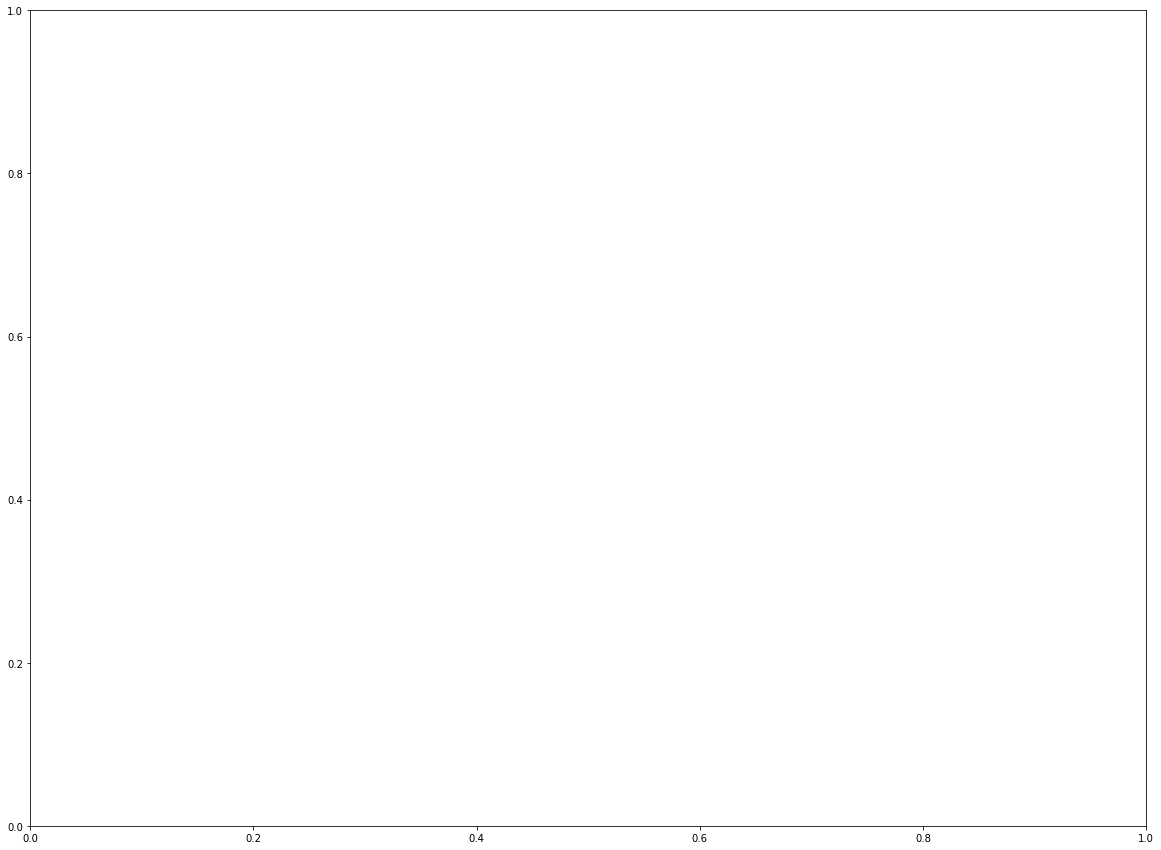

In [559]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["TrainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("Rede Neural Artificial WIN", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg.groupby((bAgreg["TrainTest"].shift() * bAgreg["TrainTest"] < 0).cumsum()).apply(grafico)